In [20]:
import cx_Oracle
import os
import pandas as pd
#from datetime import datetime
import matplotlib.pyplot as plt

In [21]:
LOCATION_ORACLE = r"D:\Downloads\instantclient_19_9"
os.environ["PATH"] = LOCATION_ORACLE + ";" + os.environ["PATH"]

In [22]:
conn = cx_Oracle.connect("patio/3miostk@//localhost:1521/XE")
cursor = conn.cursor()

In [23]:
df = pd.read_csv('D:\IT-магистратура МАИ\семестр_1\Python\HistoricalData_GOOG.csv',header = 0, delimiter = ',')
print(df)
SQL_string = '''INSERT INTO GOOG_NASDAQ
                                   ("Date",
                                    "Close_Last",
                                    "Volume",
                                    "Open",
                                    "High",
                                    "Low")
                             VALUES
                              (:p_Date, :p_Close_Last, :p_Volume, :p_Open, :p_High, :p_Low)                            
                             '''

            Date Close/Last   Volume      Open       High         Low
0     04/13/2021   $2267.27  1165804  $2261.47   $2277.21    $2256.09
1     04/12/2021   $2254.79  1565851  $2266.25   $2275.32   $2238.465
2     04/09/2021   $2285.88  1044365   $2256.7   $2289.04  $2253.7139
3     04/08/2021   $2265.44  1358259  $2277.96  $2284.005    $2257.68
4     04/07/2021   $2249.68  1289861  $2226.13      $2255  $2225.3303
...          ...        ...      ...       ...        ...         ...
1769  04/02/2014       $567   146697   $599.99    $604.83     $562.19
1770  04/01/2014    $567.16     7932   $558.71    $568.45     $558.71
1771  03/31/2014    $556.97    10772   $566.89       $567     $556.93
1772  03/28/2014    $559.99    41003    $561.2    $566.43     $558.67
1773  03/27/2014    $558.46    13052      $568       $568     $552.92

[1774 rows x 6 columns]


In [24]:
df[['Close/Last','Open','High','Low']] = df[['Close/Last','Open','High','Low']].applymap(lambda x: x[1:])
df= df.astype({'Date': 'datetime64', 'Close/Last': float,'Open': float,'High': float,'Low': float})

In [25]:
#t1 = [tuple(x) for x in df.values]
#print(t1[0])
#cursor.executemany(SQL_string,  t1) 

In [26]:
for x in df.values:
    #print(x)
    cursor.execute(SQL_string, x)
conn.commit()     #фиксация транзакции

In [27]:
cursor.execute('''SELECT * FROM GOOG_NASDAQ''')
result = cursor.fetchall()
df_o = pd.DataFrame(result, columns = ['Date','Close/Last', 'Volume', 'Open','High','Low'])



In [28]:
df_o = df_o.sort_values('Date')
df_o

,Date,Close/Last,Volume,Open,High,Low
1209,2014-03-27,558.46,13052,568.00,568.00,552.92
1208,2014-03-28,559.99,41003,561.20,566.43,558.67
1207,2014-03-31,556.97,10772,566.89,567.00,556.93
1206,2014-04-01,567.16,7932,558.71,568.45,558.71
1205,2014-04-02,567.00,146697,599.99,604.83,562.19
...,...,...,...,...,...,...
192,2021-04-07,2249.68,1289861,2226.13,2255.00,2225.33
191,2021-04-08,2265.44,1358259,2277.96,2284.01,2257.68
190,2021-04-09,2285.88,1044365,2256.70,2289.04,2253.71
189,2021-04-12,2254.79,1565851,2266.25,2275.32,2238.47


In [29]:
def correct_date():
    while True:
        try:
            input_string = input()
            if '' == input_string:
                print('Введена пустая строка')
                continue        
            date = pd.to_datetime(input_string, dayfirst = True, yearfirst = False)
            
            return date
            break
        except :
            print('Дата введена некорректно')

In [30]:
#date = pd.to_datetime('12.04.12')
#print(date)
#date.strftime('%d.%m.%Y')


In [31]:
date_one = correct_date()
print('Дата 1: '+ date_one.strftime('%d.%m.%Y'))

13.05.15
Дата 1: 13.05.2015


In [32]:
date_two = correct_date()
print('Дата 2 :'+ str(date_two.strftime('%d.%m.%Y')))

01.01.18
Дата 2 :01.01.2018


In [33]:
if (date_one > date_two):
    date_one, date_two = date_two, date_one
print(date_one, date_two)

2015-05-13 00:00:00 2018-01-01 00:00:00


In [34]:
segment = df_o[(date_one < df_o['Date']) & (df_o['Date'] < date_two)]
print(segment)

           Date  Close/Last   Volume     Open     High      Low
1757 2015-05-14      538.40  1401005   533.77   539.00   532.41
1756 2015-05-15      533.85  1965088   539.18   539.27   530.38
1755 2015-05-18      532.30  2001117   532.01   534.82   528.85
1754 2015-05-19      537.36  1964037   533.98   540.66   533.04
1753 2015-05-20      539.27  1430565   538.49   542.92   532.97
...         ...         ...      ...      ...      ...      ...
76   2017-12-22     1060.12   755089  1061.11  1064.20  1059.44
75   2017-12-26     1056.74   761097  1058.07  1060.12  1050.20
74   2017-12-27     1049.37  1271780  1057.39  1058.37  1048.05
73   2017-12-28     1048.14   833011  1051.60  1054.75  1044.77
72   2017-12-29     1046.40   886845  1046.72  1049.70  1044.90

[664 rows x 6 columns]


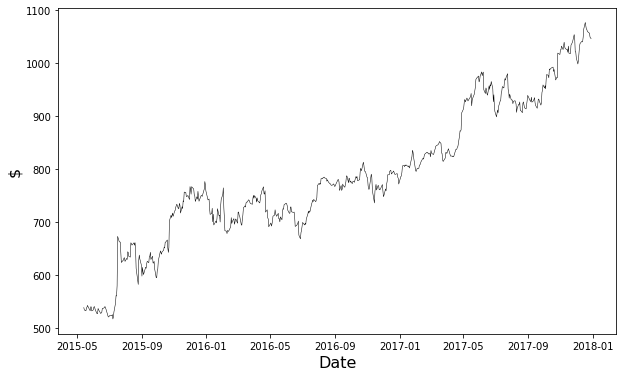

In [35]:
fig, ax = plt.subplots()

ax.plot( segment['Date'],segment['Close/Last'], color='k', linewidth = 0.5)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.xlabel("Date", fontsize=16)
plt.ylabel("$", fontsize=16)
plt.show()